# **Automatidata project**

# A machine learning model

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 


1. I am being asked to create a model, this time preferably ramdom forest model, to predict the customer behavior whether they will tip or not.
2. I am deeply concerned that informing the driver if the customer is likely to tip or not, specially if it is a false positive, will influence driver’s behavior toward the customer. Their attitude may become reckless which in effect will impact the company’s reputation.
In case of false positive, a customer might not tip if he is not pleased with the attitude of the driver.
In case of false negative, it might displease the driver, but otherwise no major impact.
3. I think the potential problems outweight the convenience.
4. I will proceed with it and build the model since this is the client's ask. Sincere there is no ethics violation such as discrimination, racial profiling, or class segregation. I would proceed with it.
5. Perhaps informing the driver is not the best idea, but depending on whether the customer will likely tip or not, the fare could be adjusted and used to compensate the driver.

In [210]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [211]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [212]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

In [213]:
# Inspect the first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [214]:
# Inspect the first few rows of `nyc_preds_means`

nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


In [215]:
# Merge datasets
df1 = pd.concat([df0, nyc_preds_means], axis=1)
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642
5,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333,12.830000,45.374542
7,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,26.437500,4.022500,18.555128
8,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,7.873457,1.019259,7.151511
9,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,10.541111,1.580000,9.122755


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 15  im

In [217]:
# Subset the data to isolate only customers who paid by credit card
df1 = df1[df1['payment_type'] == 1]


In [218]:

df1['payment_type'].unique()

array([1], dtype=int64)

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [220]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

In [221]:
# Create 'generous' col (target)
#df1['generous'] = np.where(df1['tip_percent'] > 0.2, 1, 0)
df1['generous'] = df1['tip_percent'].copy()
df1['generous'] = df1['generous'].apply(lambda x: True if x >= 0.2 else False)


In [222]:

df1['generous'] = df1['generous'].astype(int)

df1.head(10)

#df1[df1['tip_percent'] > 0.2][['total_amount', 'tip_amount', 'tip_percent', 'generous']].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,0.200,1
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,0.238,1
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,0.199,0
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,0.300,1
5,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,0.200,1
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,12.830000,45.374542,0.200,1
7,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,26.437500,4.022500,18.555128,0.100,0
9,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,10.541111,1.580000,9.122755,0.199,0
10,2,03/04/2017 11:58:00 AM,03/04/2017 12:13:12 PM,1,1.77,1,N,162,142,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76,14.178333,1.641000,10.147760,0.200,1
11,2,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,40.500000,19.211667,52.000000,0.250,1


In [223]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2017-03-25 08:55:43,2017-03-25 09:09:47
1,2017-04-11 14:53:28,2017-04-11 15:19:58
2,2017-12-15 07:26:56,2017-12-15 07:34:08
3,2017-05-07 13:17:59,2017-05-07 13:48:14
5,2017-03-25 20:34:11,2017-03-25 20:42:11
6,2017-05-03 19:04:09,2017-05-03 20:03:47
7,2017-08-15 17:41:06,2017-08-15 18:03:05
9,2017-11-10 15:20:29,2017-11-10 15:40:55
10,2017-03-04 11:58:00,2017-03-04 12:13:12
11,2017-03-05 19:15:30,2017-03-05 19:52:18


Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [224]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

#### Create time of day columns

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [225]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [226]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if (hour >= 6) & (hour < 10):
        return 1
    else:
        return 0

In [227]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1['am_rush'].apply(am_rush)

In [228]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if (hour >= 10) & (hour < 16):
        return 1
    else:
        return 0

In [229]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1['daytime'].apply(daytime)

In [230]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if (hour >= 16) & (hour < 20):
        return 1
    else:
        return 0

In [231]:
# Apply 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush)

In [232]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if (hour >= 20) | (hour< 6):
        return 1
    else:
        return 0

In [233]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1['nighttime'].apply(nighttime)

In [234]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

In [235]:

# df1['PU_DO'] = df1['PULocationID'].astype(str) + '_' + df1['DOLocationID'].astype(str)

df1['fare_rate'] = df1['predicted_fare'] / df1['mean_distance'] # due to mean distance 0, it can produce inf values which our models will not process.

#Replace inf values with default predicted_fare
df1['fare_rate'] = np.where(
    np.isinf(df1['fare_rate']),  # Condition: is infinity?
    df1['predicted_fare'],       # If True, use predicted_fare
    df1['fare_rate']             # If False, keep original fare_rate
)

df1['fare_rate'] = df1['fare_rate'].round(1)
df1['mean_duration'] = df1['mean_duration'].round(2)
df1['mean_distance'] = df1['mean_distance'].round(2)
df1['predicted_fare'] = df1['predicted_fare'].round(2)




In [236]:
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month,fare_rate
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.85,3.52,16.43,0.200,1,Saturday,1,0,0,0,March,4.7
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.47,3.11,16.05,0.238,1,Tuesday,0,1,0,0,April,5.2
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.25,0.88,7.05,0.199,0,Friday,1,0,0,0,December,8.0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.25,3.70,18.73,0.300,1,Sunday,0,1,0,0,May,5.1
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.86,2.05,10.44,0.200,1,Saturday,0,0,0,1,March,5.1
6,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.63,12.83,45.37,0.200,1,Wednesday,0,0,1,0,May,3.5
7,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,26.44,4.02,18.56,0.100,0,Tuesday,0,0,1,0,August,4.6
9,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,10.54,1.58,9.12,0.199,0,Friday,0,1,0,0,November,5.8
10,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76,14.18,1.64,10.15,0.200,1,Saturday,0,1,0,0,March,6.2
11,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,40.50,19.21,52.00,0.250,1,Sunday,0,0,1,0,March,2.7


In [237]:
# Drop columns
df1.drop(columns=['fare_amount', 'mta_tax', 'improvement_surcharge', 'extra','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type', 'tip_amount', 'tip_percent', 'store_and_fwd_flag', 'tolls_amount', 
                  'improvement_surcharge', 'mta_tax','trip_distance','total_amount','fare_amount'], inplace=True)


In [238]:
df1.head(10)

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month,fare_rate
0,2,6,1,100,231,22.85,3.52,16.43,1,Saturday,1,0,0,0,March,4.7
1,1,1,1,186,43,24.47,3.11,16.05,1,Tuesday,0,1,0,0,April,5.2
2,1,1,1,262,236,7.25,0.88,7.05,0,Friday,1,0,0,0,December,8.0
3,2,1,1,188,97,30.25,3.70,18.73,1,Sunday,0,1,0,0,May,5.1
5,2,6,1,161,236,11.86,2.05,10.44,1,Saturday,0,0,0,1,March,5.1
6,2,1,1,79,241,59.63,12.83,45.37,1,Wednesday,0,0,1,0,May,3.5
7,2,1,1,237,114,26.44,4.02,18.56,0,Tuesday,0,0,1,0,August,4.6
9,1,1,1,239,237,10.54,1.58,9.12,0,Friday,0,1,0,0,November,5.8
10,2,1,1,162,142,14.18,1.64,10.15,1,Saturday,0,1,0,0,March,6.2
11,2,2,2,236,132,40.50,19.21,52.00,1,Sunday,0,0,1,0,March,2.7


#### Variable encoding

In [239]:
# 1. Define list of cols to convert to string
cols_to_convert = ['PULocationID', 'DOLocationID', 'RatecodeID', 'VendorID']

def convert_to_string(df, cols):
    for col in cols:
        df[col]= df[col].astype(str)
    return df

convert_to_string(df1, cols_to_convert)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  object 
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  object 
 3   PULocationID     15265 non-null  object 
 4   DOLocationID     15265 non-null  object 
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int32  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
 15  fare_rate        15265 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(6)
memory usage: 1.9+

In [240]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)

In [241]:
# bool_columns = df2.select_dtypes(include=['bool']).columns  # Identify bool columns
# df2[bool_columns] = df2[bool_columns].astype(int)  # Convert bool columns to int

In [242]:
df2.head(10)

,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,fare_rate,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocat

In [243]:
# Get class balance of 'generous' col
print(df2['generous'].value_counts(normalize=True))

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64


<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

### **Modeling**

In [244]:
# Isolate target variable (y)
y= df2['generous'].copy()

# Isolate the features (X)
X = df2.drop(columns=['generous'], axis=1).copy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)   

##### **Random forest**

In [245]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42, verbose=1)

# 2. Create a dictionary of hyperparameters to tune 
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2,6],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1, 2],
    'max_samples': [0.4, 0.7],
    'max_features': [1, 0.7]
}

# 3. Define a list of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(estimator=rf, param_grid=params, scoring=scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)

In [246]:
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.5s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 6], 'max_features': [1, 0.7],
                         'max_samples': [0.4, 0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [247]:
import pickle

In [248]:
path = r"C:\Users\mypro\OneDrive\Google Datascience Course\Project Files\Course_6_automatidata_project\Activity_Course 6 Automatidata project lab"

In [249]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [250]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [251]:
write_pickle(path, rf_cv, 'rf_model')
rf_cv = read_pickle(path, 'rf_model')

In [252]:
# Examine best score
print("Best Score:", rf_cv.best_score_)

Best Score: 0.7483734983976766


In [253]:
print("Best Parameter: ", rf_cv.best_params_)

Best Parameter:  {'max_depth': 6, 'max_features': 0.7, 'max_samples': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [254]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [255]:
make_results('Random Forest', rf_cv, 'f1')

,model,precision,recall,F1,accuracy
0,Random Forest,0.693247,0.813161,0.748373,0.712167


In [256]:

best_model = rf_cv.best_estimator_
rf_preds = best_model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [257]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [258]:
 # Get scores on test data
rf_test_scores = get_test_scores('Random Forest', rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,Random Forest,0.684183,0.818295,0.745254,0.705536


##### **XGBoost**


In [259]:
from xgboost import XGBClassifier, plot_importance

# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(random_state=42, objective='binary:logistic', verbosity =0)

# 2. Create a dictionary of hyperparameters to tune
xgb_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 2, 8],
    'min_child_weight': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
}

# 3. Define a list of scoring metrics to capture
xgb_scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring=xgb_scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)



In [260]:

xgb_cv = xgb1.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [261]:
# Examine best score
print("Best Score: ", xgb_cv.best_score_)

print("Best Index", xgb_cv.best_index_)


Best Score:  0.7479528626991435
Best Index 13


In [262]:
# Examine best parameters
print("Best Parameter: ", xgb_cv.best_params_)

Best Parameter:  {'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 400}


In [263]:
# Call 'make_results()' on the GridSearch object
make_results('XGBoost', xgb_cv, 'f1')

,model,precision,recall,F1,accuracy
0,XGBoost,0.693895,0.811294,0.747953,0.712167


In [264]:
xgb_cv.cv_results_

{'mean_fit_time': array([3.76248269, 4.57681518, 6.61640749, 4.19910064, 4.34252558,
        5.30896497, 3.64437675, 4.36653004, 5.37163539, 2.5144022 ,
        3.33759837, 3.77257028, 3.9043313 , 3.64337497, 3.78913369,
        2.5595221 , 3.36896205, 3.90209579, 4.32859354, 5.51707025,
        8.64175429, 7.23489113, 5.38086262, 6.59445381, 4.41958961,
        5.28720355, 6.13893013, 2.87991982, 3.6599668 , 4.44050746,
        2.86400595, 3.47479701, 4.31253228, 2.76500072, 3.82139735,
        4.24308643, 2.76804662, 2.78538899, 3.19300218, 2.17169566,
        3.06164269, 3.54284673, 2.29140568, 3.98731809, 3.53696823,
        5.01218371, 4.32113791, 5.26054993, 3.31336999, 4.25781288,
        5.10214887, 3.29509749, 4.00678768, 4.06900711]),
 'std_fit_time': array([0.15405926, 0.12650896, 2.77948469, 0.95484983, 0.03839035,
        0.13915171, 0.0944812 , 0.12310891, 0.11164387, 0.05721983,
        0.16549428, 0.13952095, 2.60215432, 1.14176401, 0.08122328,
        0.05276884, 0.098

In [265]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

In [266]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGBoost', xgb_preds, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGBoost,0.685894,0.813939,0.744451,0.705863


Plot a confusion matrix of the model's predictions on the test data.

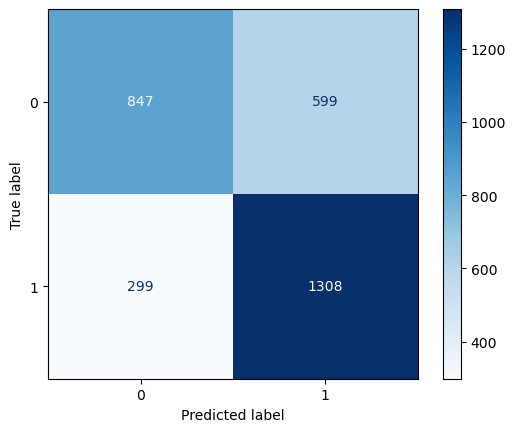

In [267]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
display.plot(cmap=plt.cm.Blues, values_format='d')


##### Feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

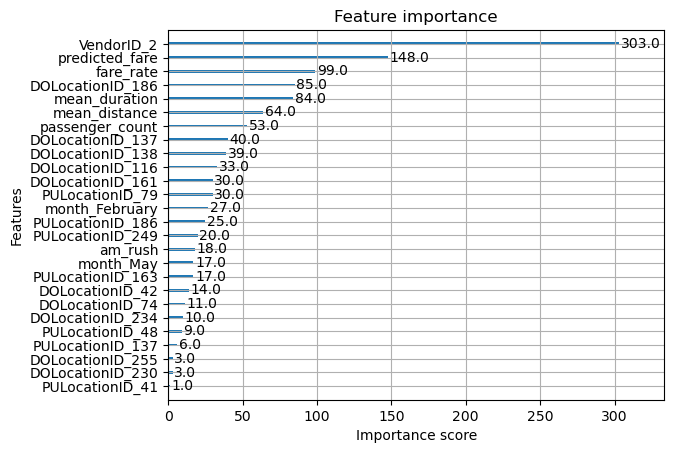

In [268]:
#==> ENTER YOUR CODE HERE
# Plot feature importance
plot_importance(xgb_cv.best_estimator_)

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

2. **What was your model doing? Can you explain how it was making predictions?**   

3. **Are there new features that you can engineer that might improve model performance?**   

4. **What features would you want to have that would likely improve the performance of your model?**   

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.